In [1]:
import sklearn
sklearn.__version__

'0.24.1'

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', 100)

In [16]:
df = pd.read_csv('../Data/Overdose.csv')
del df['Footnote']
df.head()

,State,State Name,Year,Month,Period,Indicator,Data Value,Percent Complete,Percent Pending Investigation
0,ME,Maine,2015,November,12 month-ending,Cocaine (T40.5),33.0,100,0.0
1,NV,Nevada,2016,July,12 month-ending,Methadone (T40.3),59.0,100,0.0
2,VT,Vermont,2016,July,12 month-ending,Number of Deaths,5715.0,100,0.0
3,AK,Alaska,2016,May,12 month-ending,Number of Deaths,4241.0,100,0.0
4,AK,Alaska,2015,January,12 month-ending,Number of Deaths,4034.0,100,0.0


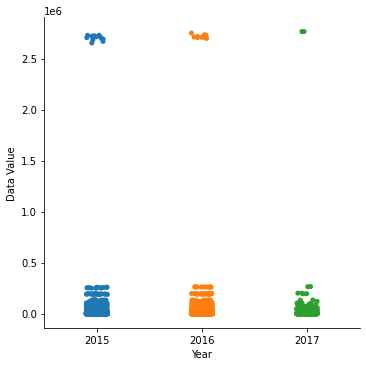

In [14]:
sns.catplot(x = "Year", y = "Data Value", data = df)

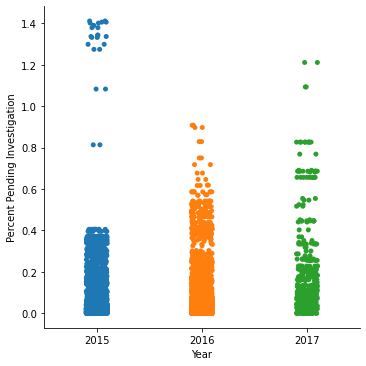

In [17]:
sns.catplot(x = "Year", y = "Percent Pending Investigation", data = df)

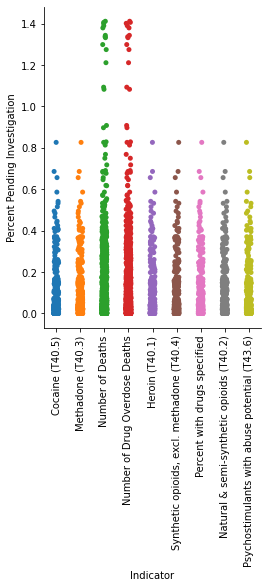

In [27]:
chart = sns.catplot(x = "Indicator", y = "Percent Pending Investigation", hue = 'Indicator', data = df)
chart.set_xticklabels(rotation = 90)

In [28]:
df2 = df[['Year', 'Data Value', 'Percent Complete', 'Percent Pending Investigation']]
df2.head()

,Year,Data Value,Percent Complete,Percent Pending Investigation
0,2015,33.0,100,0.0
1,2016,59.0,100,0.0
2,2016,5715.0,100,0.0
3,2016,4241.0,100,0.0
4,2015,4034.0,100,0.0


In [31]:
del df2['Percent Complete']
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6214 entries, 0 to 6213
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year                           6214 non-null   int64  
 1   Data Value                     6214 non-null   float64
 2   Percent Pending Investigation  6214 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 145.8 KB


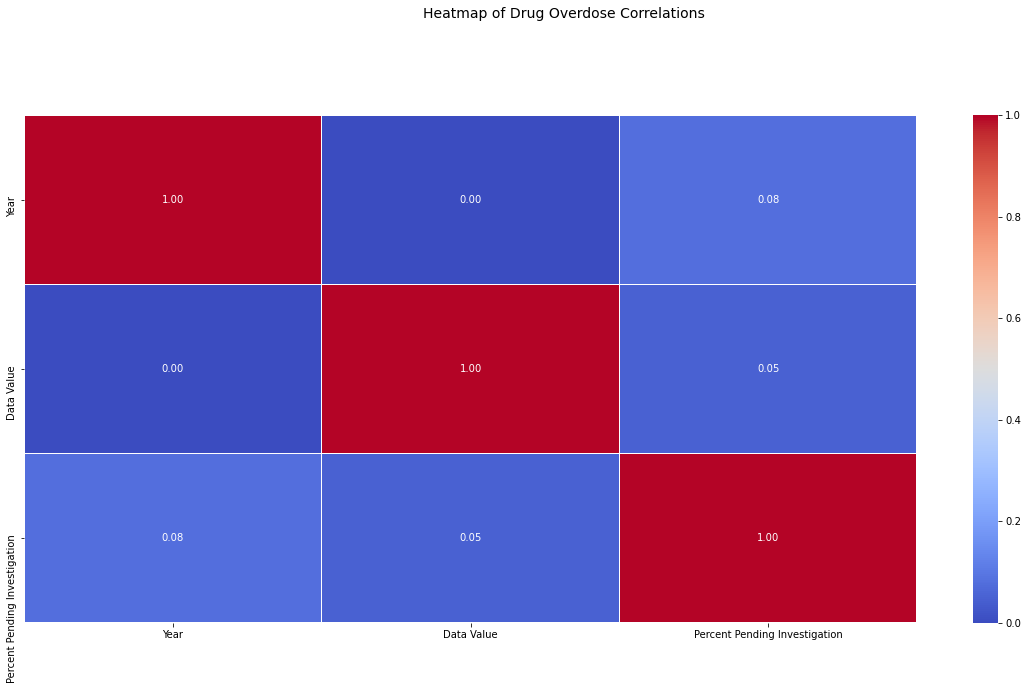

In [32]:
f, ax = plt.subplots(figsize=(20,10))
df2corr = df2.corr()
hm = sns.heatmap(round(df2corr, 2), annot = True, ax=ax, cmap = "coolwarm", fmt = '.2f', linewidths = .05)
f.subplots_adjust(top=0.83)
t = f.suptitle('Heatmap of Drug Overdose Correlations', fontsize = 14)